In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test)  = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 127s 1us/step


In [5]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
x_test.shape , y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [9]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [11]:
 y_train.shape,  y_test.shape

((50000,), (10000,))

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

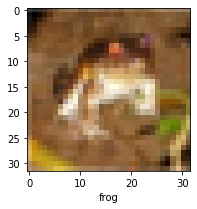

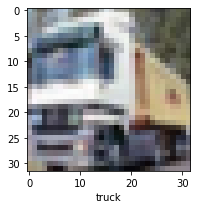

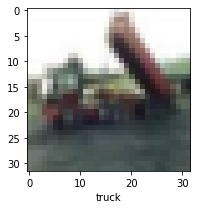

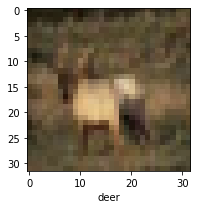

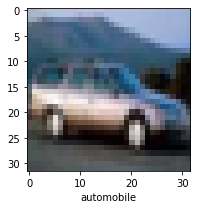

In [14]:
for i in range(5):
    plt.figure(figsize=(15,3))
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i]])

In [15]:
#Normalizing the data 
x_train=x_train/255
x_test=x_test/255

## Using ANN for Classification

In [ ]:
#Simplified manner
ann_model=models.Sequential([
                     layers.Flatten(input_shape=(32,32,3)),    
                     layers.Dense(300, activation='relu'),
                     layers.Dense(300, activation='relu'),
                     layers.Dense(300, activation='relu')    
])


In [24]:
model = models.Sequential()
model.add(layers.Flatten(input_shape = (32,32,3)))
model.add(layers.Dense(300, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [25]:
model.compile(optimizer ='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9851 - accuracy: 0.2776
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7024 - accuracy: 0.3955
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6133 - accuracy: 0.4284
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5522 - accuracy: 0.4470
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5151 - accuracy: 0.4634
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4677 - accuracy: 0.4798
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4378 - accuracy: 0.4889
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4062 - accuracy: 0.5023
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3896 - accuracy: 0.5077
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.36

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred[1]

array([2.22900342e-02, 4.33616966e-01, 1.29929220e-03, 1.34954811e-03,
       6.91222958e-04, 2.66583753e-04, 7.10203822e-05, 2.01802381e-04,
       1.04222015e-01, 4.35991526e-01], dtype=float32)

In [30]:
y_pred_refined=[np.argmax(i) for i in y_pred]

In [51]:
print(accuracy_score(y_pred_refined, y_test))

0.494


<AxesSubplot:>

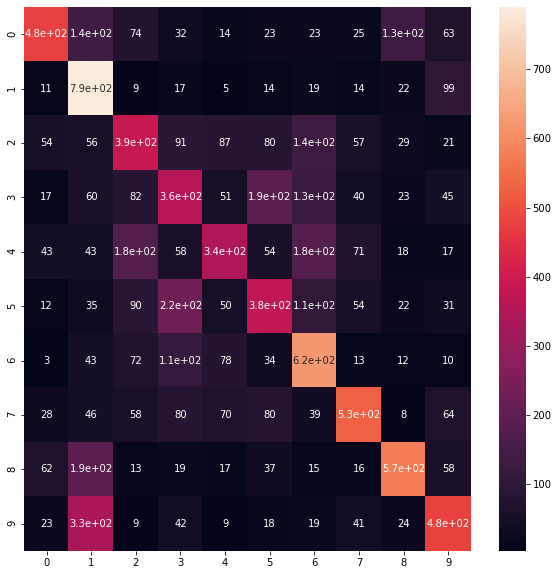

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(tf.math.confusion_matrix(labels=y_test,predictions=y_pred_refined), annot = True)

## CNN for above model

In [56]:
cmodel = models.Sequential()
cmodel.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' , input_shape = (32,32,3) ))
cmodel.add(layers.MaxPool2D())


cmodel.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cmodel.add(layers.MaxPool2D())

cmodel.add(layers.Flatten())

cmodel.add(layers.Dense(64,activation='relu'))
cmodel.add(layers.Dense(10,activation='softmax'))

In [57]:
cmodel.compile(optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [58]:
cmodel.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.7292 - accuracy: 0.3710
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.2000 - accuracy: 0.57700s - loss: 1
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0396 - accuracy: 0.6383
Epoch 4/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9485 - accuracy: 0.66850s - loss:
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8855 - accuracy: 0.6913
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8421 - accuracy: 0.7049
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7962 - accuracy: 0.7196
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7578 - accuracy: 0.7353
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7164 - accuracy: 0.7507 ETA: 0s - loss: 0
Epoch 10/10
1563/1563 [=

In [62]:
y_pred = cmodel.predict(x_test)

In [63]:
y_pred_refined=[np.argmax(i) for i in y_pred]

In [64]:
print(accuracy_score(y_pred_refined, y_test))

0.6753
